In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
from copy import deepcopy as dcopy

In [2]:
def route_image(list_cities, route):
  # пронумеруем города
  for i in range(number_cities):
    plt.annotate(i, (list_cities[i][0], list_cities[i][1]), fontsize = 11)
    # нарисуем города
  plt.scatter(list_cities[:, 0], list_cities[:, 1], c='red')
  # нарисуем маршрут
  x = [list_cities[route[-1]][0]]
  y = [list_cities[route[-1]][1]]
  for i in range(len(route)):
    x.append(list_cities[route[i]][0])
    y.append(list_cities[route[i]][1])
  plt.plot(x, y, c='blue')
  # выведем изображение
  plt.show()

In [3]:
def route_length(list_cities, route):
  # штраф за не посещение города
  miss_city_penalty = 0
  for i in range(len(list_cities)):
    if i not in route:
      miss_city_penalty += 10
  length_current_route = 0
  for i in range(len(route)-1):
      length_current_route += np.sqrt((list_cities[route[i+1]][0]-list_cities[route[i]][0])**2 + (list_cities[route[i+1]][1]-list_cities[route[i]][1])**2)
  return length_current_route + miss_city_penalty

In [4]:
def quality(list_cities, routes):
  routes_quality = np.zeros([len(routes)])
  for i,route in enumerate(routes):
    routes_quality[i] = route_length(list_cities,route)
  return routes_quality

In [5]:
def mutation(route):
  h = random.randint(0,13)
  for i in range(len(route)//5):
      if h<13 and (route[h] != route[h+1]):
        route[[h, h+1]] = route[[h+1, h]]
  return route

In [6]:
def crossbreeding(route_1, route_2):
  route_3 = route_1.copy()
  g = random.randint(1, 13)
  for j in range(len(route_2)-1):
      if (route_3[g] != route_2[g]) and (route_3[g+1] != route_2[g+1]) and (route_3[g] != route_2[j]) and (route_3[g+1] != route_2[j]):
          route_3[g] = route_2[g]
          route_3[g+1] = route_2[g+1]
  return route_3

Итерация: 0
Маршрут:  [13  7  6 11  3  5  0 10 14  9  4  8 12  2  1]
Качество маршрута: 7.237303507857717 



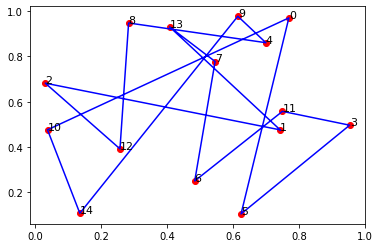

Итерация: 200
Маршрут:  [13  9 11  3  0  4  1  5  6 14 12 10  2  7  8]
Качество маршрута: 4.446925746227304 



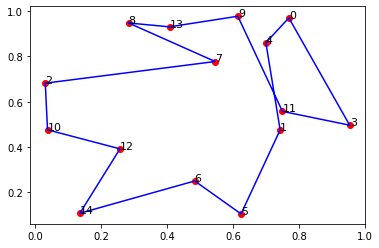

Итерация: 400
Маршрут:  [13  9 11  3  0  4  1  5  6 14 12 10  2  7  8]
Качество маршрута: 4.446925746227304 



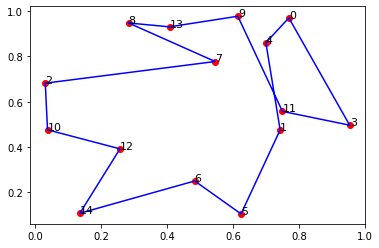

Итерация: 600
Маршрут:  [13  9 11  3  0  4  1  5  6 14 12 10  2  7  8]
Качество маршрута: 4.446925746227304 



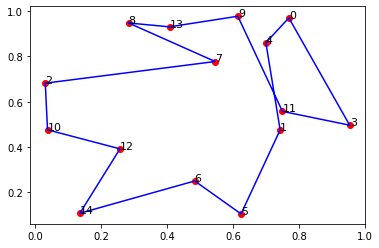

Итерация: 800
Маршрут:  [13  0  9  4 11  3  7  1  5  6 14 12 10  2  8]
Качество маршрута: 4.125491896046405 



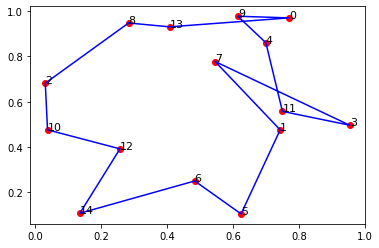

Итерация: 1000
Маршрут:  [13  9  4  0  7 11  3  1  5  6 14 12 10  2  8]
Качество маршрута: 3.5926160615315115 



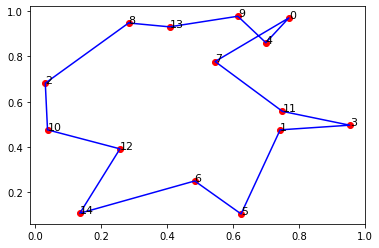

Min_route:  [13  9  4  0  7 11  3  1  5  6 14 12 10  2  8]
Min_route_quality:  3.5926160615315115


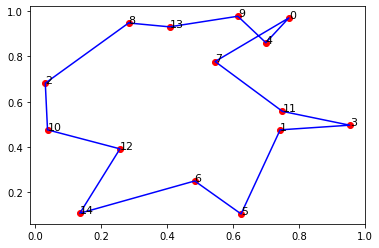

In [7]:
number_cities = 15
list_cities = np.random.random([number_cities, 2]) # спискок координат городов

# генерация маршрутов без повторений
number_routes = 100
routes = []
for i in range(number_routes):
  routes.append(np.random.permutation(number_cities))
routes = np.array(routes)

number_iterations = 1001 # количество итераций улучшения

# 2. Оценка качества особей. Функция приспособленности.
# routes_quality - список оценок всех особей популяции

for i in range(number_iterations):
  if i%((number_iterations)//5) == 0:
    print("Итерация:", i)
    print("Маршрут: ", routes[0])
    print("Качество маршрута:", route_length(list_cities, routes[0]), '\n')
    route_image(list_cities, routes[0])

  # отсортируем особи в порядке от наиболее приспособленных к наименее приспособленным
  routes_quality = quality(list_cities , routes)
  sort_indx = routes_quality.argsort() # индексы отсортированных элементов
  routes_quality = routes_quality[sort_indx] # меняем оценки качества особей местами в соответствии с отсортированными индексами
  routes = routes[sort_indx] # меняем особи местами в соответствии с отсортированными индексами

  route_index_1 = np.random.randint(number_routes*0.5)
  route_index_2 = np.random.randint(number_routes*0.5)

  sel_r = routes.copy()
  for i in range(2, int(number_routes)):
      if np.random.random()<0.5:
        routes[i] = mutation(sel_r[route_index_1])
      else:
        routes[i] = crossbreeding(sel_r[route_index_1], sel_r[route_index_2])
  
shesh = quality(list_cities, routes)
min_route = routes[np.argmin(shesh)]
print("Min_route: ", min_route)
print("Min_route_quality: ", route_length(list_cities, min_route))
route_image(list_cities, min_route)